In [1]:
import scripro

In [2]:
import anndata as ad

In [3]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
rna = sc.read_h5ad("/fs/home/changzhanhe/Project/Analysis/cuilian/PN23061305.diff_PRO.h5ad")

In [5]:
rna.var_names_make_unique()

In [6]:
rna

AnnData object with n_obs × n_vars = 57303 × 27983
    obs: 'rawname', 'sample', 'gname', 'platform', 'nFeature_RNA', 'nCount_RNA', 'total_counts_mt', 'percent_mt', 'total_counts_plat', 'pct_counts_plat', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'louvain', 'raw_cluster', 'sample_colors', 'gname_colors', 'raw_cluster_colors', 'cluster', 'cluster_standard', 'cluster_colors'
    var: 'mt', 'plat', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cluster_colors', 'gname_colors', 'hvg', 'louvain', 'manual_result', 'neighbors', 'pca', 'phase_colors', 'preprocess_para', 'rank_genes_groups', 'rank_genes_groups_cluster', 'rank_genes_groups_raw_cluster', 'raw_cluster_colors', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
    varm:

## Calculate Supercell and markergene

In [7]:
test_data = scripro.Ori_Data(rna,Cell_num=100,cluster_method='cluster')

In [8]:
%%time
test_data.get_positive_marker_gene_parallel(cores=4)

CPU times: user 20.6 s, sys: 11.2 s, total: 31.8 s
Wall time: 49.7 s


In [9]:
rna_seq_data = scripro.SCRIPro_RNA(8,'hg38',test_data,assays=['Direct','DNase','H3K27ac'])

## Calculate the TF activity score

In [10]:
rna_seq_data.cal_ISD_cistrome()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [1:07:37<00:00,  8.10s/it]


In [11]:
rna_seq_data.get_P_value_matrix()

In [12]:
rna_seq_data.get_chip_matrix()

In [13]:
rna_seq_data.P_value_matrix

factor,FOXA1,ESR1,AR,EP300,PIAS1,GATA3,NR3C1,HNF4G,PR,HOXB13,...,ZNF561,ZNF131,ZNF77,ZNF846,ZNF318,ZNF654,ZNF354C,ZNF169,ZNF557,ZNF649
SweatGlandCells_27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984314,...,0.000372,3.290730e-04,0.000324,0.000144,6.577072e-05,4.838399e-05,0.000031,0.000007,0.000003,0.000000
ECs_23,0.645512,0.382921,0.668420,1.000000,0.176393,0.508276,0.550242,0.113682,0.282211,0.509642,...,0.017081,4.431660e-12,0.021144,0.008072,3.130288e-09,1.693473e-09,0.003444,0.001950,0.002052,0.004241
Adipocytes_3,0.598097,0.201328,0.438543,0.534531,0.276511,0.490847,0.733954,0.345096,0.491835,0.586718,...,0.033354,4.708419e-08,0.030510,0.010170,2.881481e-06,1.943813e-17,0.004711,0.004091,0.004357,0.000951
Fibroblasts_37,0.539257,0.210366,0.351511,1.000000,0.000023,0.808222,0.820473,0.119131,0.593699,0.500697,...,0.093498,1.874728e-07,0.108450,0.054763,1.047369e-10,6.091917e-08,0.049297,0.016827,0.021010,0.044508
Fibroblasts_104,0.200281,0.322326,0.369448,0.868530,0.012579,0.508820,0.552236,0.335976,0.612276,0.119225,...,0.224242,1.639699e-01,0.202887,0.211741,3.184414e-02,3.227493e-02,0.208612,0.086421,0.100378,0.144796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fibroblasts_18,0.431912,0.183399,0.555748,1.000000,0.074337,0.792757,1.000000,0.117176,0.848846,0.536979,...,0.040030,5.753971e-07,0.045996,0.024352,6.280382e-04,2.302401e-05,0.020105,0.006653,0.007471,0.005278
Keratinocytes_6,1.000000,0.795269,0.707722,0.773553,0.539709,1.000000,0.494129,0.192505,0.395188,1.000000,...,0.001469,9.164063e-06,0.001848,0.000981,4.494010e-07,1.809492e-09,0.000452,0.000656,0.001207,0.000647
MPs_13,0.226067,0.113034,0.264324,0.546718,0.040690,0.378858,0.442508,0.063998,0.114668,0.139208,...,0.021877,9.225470e-07,0.013629,0.007961,7.072364e-02,4.497504e-06,0.008351,0.004524,0.004560,0.004654
TCells_6,0.104251,0.101915,0.101077,1.000000,0.034023,1.000000,0.530006,0.116236,0.086029,0.059086,...,0.005293,5.730713e-05,0.002061,0.003310,1.907484e-02,4.847989e-08,0.003441,0.003543,0.003327,0.002515


In [14]:
%%time
rna_seq_data.get_tf()

CPU times: user 11min 54s, sys: 776 ms, total: 11min 55s
Wall time: 12min


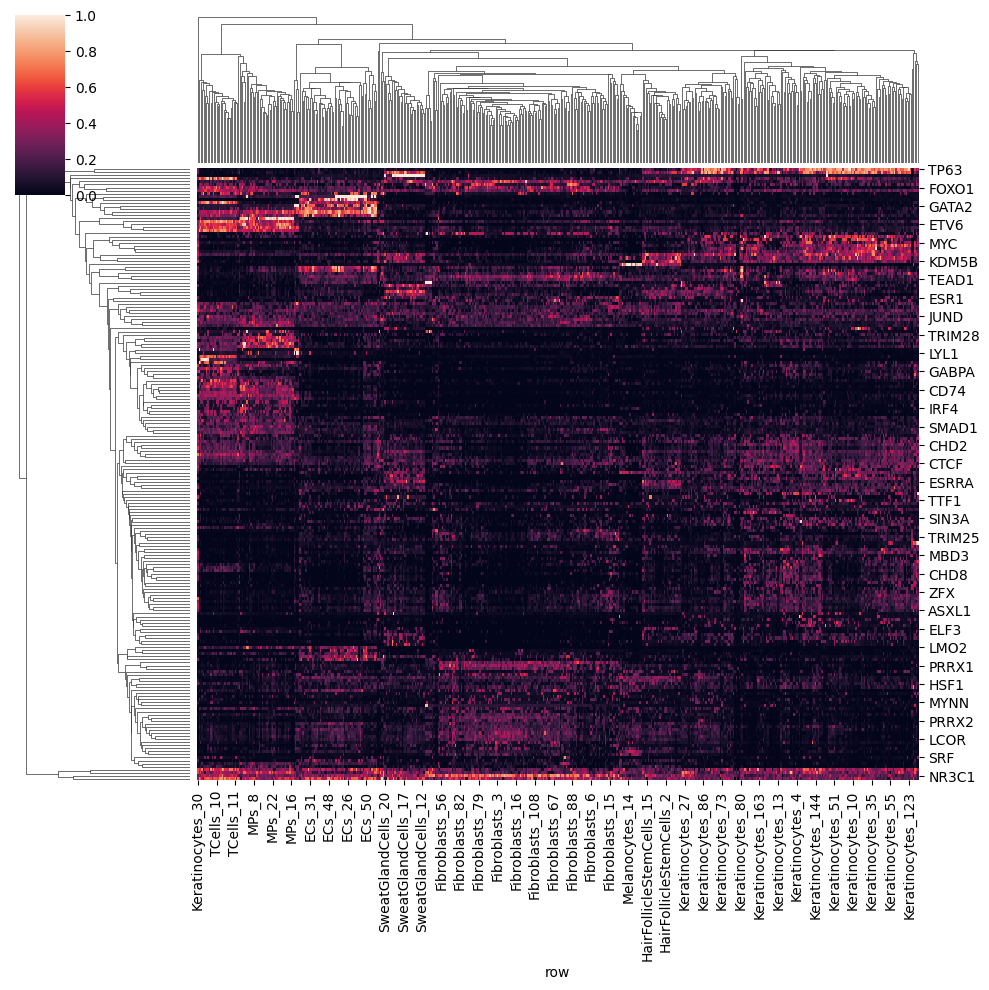

In [15]:
sns.clustermap(rna_seq_data.tf_score.loc[:,rna_seq_data.tf_score.std().sort_values(ascending = False)[0:200].index].T)

In [16]:
rna_seq_data.tf_score

,ADNP,AFF1,AFF4,AGO1,AHR,AIRE,ALX1,ALX3,ALX4,ANHX,...,ZSCAN20,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN4,ZSCAN5A,ZXDB,ZXDC
row,,,,,,,,,,,,,,,,,,,,,
Adipocytes_0,1.691246e-09,0.000382,8.255594e-07,6.186518e-03,0.006914,0.031672,0.036253,0.0,0.056008,0.0,...,0.005427,0.001340,0.000807,0.011887,3.551569e-04,0.025413,0.013530,2.014306e-07,4.635083e-11,7.806474e-05
Adipocytes_1,8.209313e-13,0.000330,1.052539e-12,1.903362e-11,0.059432,0.032476,0.035945,0.0,0.052986,0.0,...,0.004105,0.001407,0.000074,0.008612,4.624238e-07,0.027313,0.014794,2.072920e-06,1.031368e-11,6.551776e-09
Adipocytes_2,1.233118e-12,0.032223,1.550738e-10,1.663165e-05,0.084906,0.025508,0.029957,0.0,0.075600,0.0,...,0.004837,0.001285,0.001254,0.021302,5.772353e-04,0.032374,0.012832,1.953287e-03,3.619082e-09,8.717990e-08
Adipocytes_3,1.623387e-12,0.000130,1.076169e-12,2.233228e-08,0.003468,0.021019,0.042873,0.0,0.065411,0.0,...,0.003677,0.000376,0.000248,0.007305,1.224110e-04,0.025570,0.010176,4.755884e-06,2.478433e-12,6.598249e-09
Adipocytes_4,2.510444e-07,0.065122,4.291893e-05,2.022694e-02,0.005058,0.032816,0.029513,0.0,0.047576,0.0,...,0.001103,0.001818,0.000341,0.025898,5.591698e-03,0.016309,0.004278,3.122635e-03,2.222954e-05,1.682156e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCells_5,2.299170e-03,0.067281,3.043307e-01,9.599662e-03,0.007496,0.012635,0.020133,0.0,0.018661,0.0,...,0.003217,0.000943,0.000273,0.005988,4.222312e-03,0.013868,0.007395,5.325158e-04,8.991181e-06,1.281100e-02
TCells_6,1.480940e-03,0.050075,1.818776e-01,2.693208e-04,0.060617,0.007118,0.008195,0.0,0.002797,0.0,...,0.000304,0.002718,0.000581,0.006255,4.025435e-03,0.004457,0.007053,5.154755e-04,1.816293e-09,8.105714e-06
TCells_7,4.538637e-05,0.093015,3.361200e-02,7.384853e-03,0.003627,0.023710,0.027626,0.0,0.025590,0.0,...,0.002536,0.000675,0.000229,0.008813,3.946291e-05,0.016098,0.006287,8.115752e-04,7.929090e-08,7.402800e-04


In [18]:
all_cell_score = pd.merge(test_data.adata.obs,rna_seq_data.tf_score,left_on='new_leiden',right_index=True).iloc[:,2:]

In [19]:
all_cell_anndata = sc.AnnData(all_cell_score)

In [20]:
tem_anndata = test_data.adata[all_cell_score.index]

In [21]:
all_cell_anndata.obsm = tem_anndata.obsm

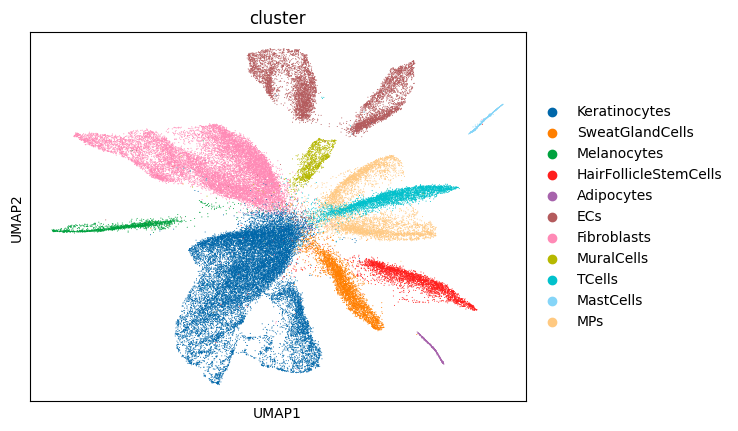

In [25]:
sc.pl.umap(test_data.adata,color = 'cluster')

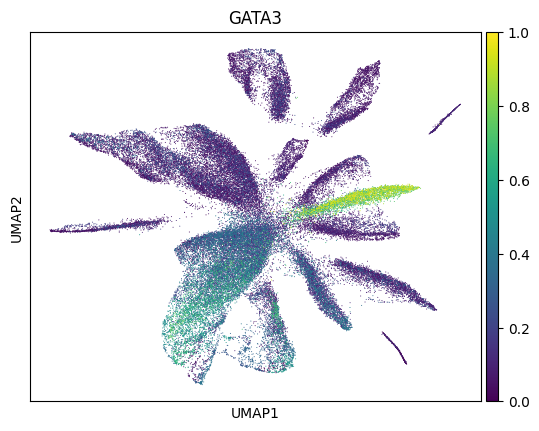

In [22]:
sc.pl.umap(all_cell_anndata,color = 'GATA3')

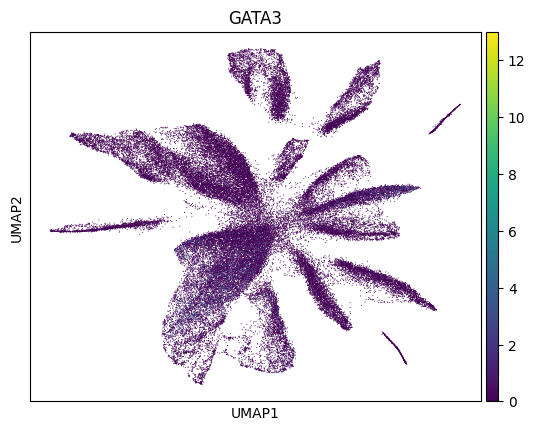

In [23]:
sc.pl.umap(test_data.adata,color = 'GATA3')

In [33]:
test_data.adata.obs

,rawname,sample,gname,platform,nFeature_RNA,nCount_RNA,total_counts_mt,percent_mt,total_counts_plat,pct_counts_plat,...,phase,louvain,raw_cluster,sample_colors,gname_colors,raw_cluster_colors,cluster,cluster_standard,cluster_colors,new_leiden
HC_AACACACAGAACGCTAGTATGAGTCCT,NN-ZMQ,HC,HC,A,357.0,539.0,0.0,0.000000,0.0,0.0,...,S,0,1,#0067AA,#0067AA,#0067AA,Keratinocytes,Keratinocytes,#0067AA,Keratinocytes_20
HC_AACACACAGAACGCTAGTCCAATTGGC,NN-ZMQ,HC,HC,A,479.0,753.0,0.0,0.000000,0.0,0.0,...,G1,0,1,#0067AA,#0067AA,#0067AA,Keratinocytes,Keratinocytes,#0067AA,Keratinocytes_20
HC_AACACACAGAACGCTAGTGCTAAGCAT,NN-ZMQ,HC,HC,A,397.0,695.0,0.0,0.000000,0.0,0.0,...,G1,6,7,#0067AA,#0067AA,#FF8AB6,SweatGlandCells,Sweat gland cells,#FF7F00,SweatGlandCells_8
HC_AACACACAGAACGCTAGTTGCACGAGA,NN-ZMQ,HC,HC,A,989.0,1822.0,0.0,0.000000,0.0,0.0,...,G1,14,15,#0067AA,#0067AA,#8A5626,Fibroblasts,Fibroblasts,#FF8AB6,Fibroblasts_70
HC_AACACACAGAACGTCCAACACCTAACG,NN-ZMQ,HC,HC,A,666.0,1007.0,0.0,0.000000,0.0,0.0,...,G2M,15,16,#0067AA,#0067AA,#502E91,MPs,Mononuclear phagocytes,#FFC981,MPs_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CL_TGTGGACACTTCGAGGATCTTGGAAGA,HCW-12w,CL,CL,A,2014.0,4285.0,49.0,1.143524,0.0,0.0,...,G1,3,4,#00A23F,#00A23F,#FF1F1D,Fibroblasts,Fibroblasts,#FF8AB6,Fibroblasts_1
CL_TGTGGACACTTCGAGGATGACGTAGAG,HCW-12w,CL,CL,A,458.0,832.0,7.0,0.841346,0.0,0.0,...,S,5,6,#00A23F,#00A23F,#B45B5D,Keratinocytes,Keratinocytes,#0067AA,Keratinocytes_24
CL_TGTGGACACTTGAGACAGTTAAGAGGC,HCW-12w,CL,CL,A,511.0,821.0,24.0,2.923264,0.0,0.0,...,G1,4,5,#00A23F,#00A23F,#A763AC,TCells,T cells,#01C1CC,TCells_15
CL_TGTGGACACTTGCCGTCAAACAAGTGG,HCW-12w,CL,CL,A,360.0,567.0,28.0,4.938272,0.0,0.0,...,G1,13,14,#00A23F,#00A23F,#EFC800,ECs,Endothelial cells,#B45B5D,ECs_18


In [32]:
rna_seq_data.get_tf_target('GATA3')

,NRCAM,EVL,ALKBH8,NRAP,PTGFRN,ARHGAP22,NUMA1,ZMYND11,ARHGEF10L,SYBU,...,RPL14,BTG1,ZFC3H1,C10orf67,ATP5IF1,PHC2,ABL1,SRF,FOXQ1,SLC44A2
SweatGlandCells_27,0.000000,0.068660,0.000000,0.0,0.0,0.0,0.125811,0.102786,0.0,0.000000,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
ECs_23,0.000000,0.014514,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
Adipocytes_3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
Fibroblasts_37,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
Fibroblasts_104,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fibroblasts_18,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.015408,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
Keratinocytes_6,0.050664,0.081864,0.016884,0.0,0.0,0.0,0.040165,0.125413,0.0,0.001814,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
MPs_13,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0
TCells_6,0.000000,0.011532,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0,0,0,0.0,0,0.0


In [28]:
rna_seq_data.chip_matrix_melt

,row,column,value,value2
0,SweatGlandCells_27,PRAME,"[OPA3, METTL5, DDX54, PIGO, IGFLR1, KMT2D, LRP...",-0.121500
1,ECs_23,PRAME,"[OPA3, METTL5, DDX54, PIGO, IGFLR1, KMT2D, LRP...",0.257185
2,Adipocytes_3,PRAME,"[OPA3, METTL5, DDX54, PIGO, IGFLR1, KMT2D, LRP...",-0.210031
3,Fibroblasts_37,PRAME,"[OPA3, METTL5, DDX54, PIGO, IGFLR1, KMT2D, LRP...",-0.259556
4,Fibroblasts_104,PRAME,"[OPA3, METTL5, DDX54, PIGO, IGFLR1, KMT2D, LRP...",-0.115130
...,...,...,...,...
544081,Fibroblasts_18,MTF2,"[CLDN7, RNF150, ZBTB14, MYLK4, FOXF1, SHH, COM...",0.209756
544082,Keratinocytes_6,MTF2,"[CLDN7, RNF150, ZBTB14, MYLK4, FOXF1, SHH, COM...",0.265271
544083,MPs_13,MTF2,"[CLDN7, RNF150, ZBTB14, MYLK4, FOXF1, SHH, COM...",1.490740
544084,TCells_6,MTF2,"[CLDN7, RNF150, ZBTB14, MYLK4, FOXF1, SHH, COM...",1.410600


In [30]:
C =rna_seq_data.chip_matrix_melt[rna_seq_data.chip_matrix_melt.column == 'gata3']

In [31]:
C

,row,column,value,value2


In [34]:
import pickle

In [37]:
with open('scripro_result.pkl', 'rb') as file:
    scripro_data = pickle.load(file)

In [36]:
with open('scripro_result.pkl', 'wb') as file:
    pickle.dump(rna_seq_data, file)

In [38]:
!pwd

/fs/home/xuyunfan/Final/SCRIPro/examples


In [39]:
/fs/home/xuyunfan/Final/SCRIPro/examples/scripro_result.pkl

NameError: name 'fs' is not defined